# Hello Dear Sir/Madam
### Thanks for Reaching out to me. First of all, I am sorry for taking the time to submit the solution. Appreciate your patience. 

## Short-Bio
## My Name is Nitin Shravan. I am  an M.tech graduate from the Indian Institute of Information Technology Design and Manufacturing, Chennai. I am working full-time as a Research Scientist at Buddi.ai. It is as an AI company in the healthcare revenue space. I have been in the company for almost two years now. My responsibilities include developing creative solutions for unsolved problems, Building ML/DL models, Creating ML/DL algorithms etc...

## As a result of my work here. I have been able to publish a research paper @CODS-COMAD 2021 titled "Is it hard to learn a classifier on this Dataset?". This was a novel algorithm and was applied for a patent. For most of my time here, I was working on pure ML research problems in collaboration with IIT madras. Recently, I have been working on NLP using DL.

## I have organized this notebook to express my train of thoughts and the process I went through as I was trying to solve. 

# Regression Problem

In [2]:
# imports required
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

## Importing Datatset

In [3]:
 DF = pd.read_excel("layeriv_regression_data.xls")
 print("shape:",DF.shape)
 DF.head(5)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
shape: (63, 2)


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


** Very few number of data points. Only 63!!!  
** Only one feature !


*** Let's get an idea about our X and Y

In [4]:
DF.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


*** No -ve values. 
Let's see how the data looks. 
## Data visualization

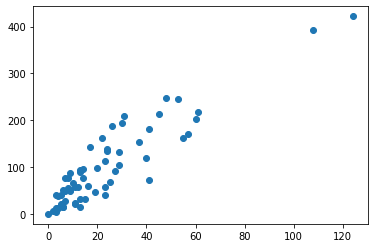

In [5]:
plt.scatter(DF['X'],DF['Y'])
plt.show()

** The dataseems to be more or less fitted by a straight line. But the when 20< x <60   ==> we have high variance.

*** The variance keeps changing. The spread keeps increasing along X 

More over it seems  discontinues, only two points after x>70!!!

This seems like a case of heterodasticity (not sure though). where the variance for the feature keeps changing.
 
 For ref: https://stats.stackexchange.com/questions/275925/linear-regression-with-changing-variance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of X')

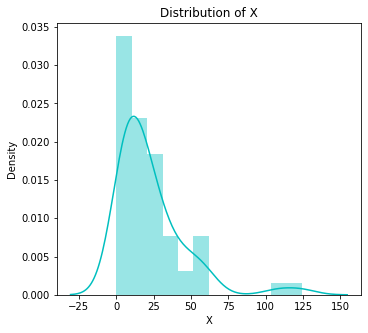

In [6]:
import seaborn as sns

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(DF["X"],color='c',ax=ax)
ax.set_title('Distribution of X')

** We see that the data is pretty skewed to the left. Also the Points at the far right x>100 is a concern.


** Being in industry  as an ML engineeri. I've been advised on one golden advise which is "if you are going to Fail, Fail Fast"

With that in mind Let's just set a Baseline first to work with. Maybe it will shed some light.



In [7]:
# let's see the correlation betwen x and y

from scipy.stats.stats import pearsonr
correlation = pearsonr(DF["X"], DF["Y"])
print("corr:",correlation)

corr: (0.9128782350234067, 2.046637844952289e-25)


In [8]:
# just as seen in that plot the person corr metric also says that our x & y are +vely correlated

## Baseline-Model

We are gonna try basic linear regression first.


In [9]:
#lets split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(DF["X"],DF["Y"],random_state= 1)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


x_train_ = x_train[:,np.newaxis]
x_test_ = x_test[:,np.newaxis]



# x = DF["X"][:,np.newaxis]
# y = DF["Y"][:,np.newaxis]

(47,) (47,)
(16,) (16,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


In [10]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
#lets fit 
LR.fit(x_train_,y_train)
y_pred = LR.predict(x_test_)

In [11]:
# Lets calculate r2 score which is used to acces the fitness of the regressor
from sklearn.metrics import r2_score
print("r2:", r2_score(y_test, y_pred))
# Let calculate MAE to get an idea where we stand 
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

r2: 0.7971386424990525
MAE: 27.391486320581407


**Not bad we have a pretty decent fitted model (r2 ~80%)

**still the MAE is pretty high that is a concern

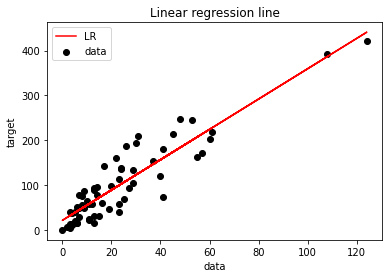

In [12]:
plt.scatter(DF['X'], DF['Y'], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(DF["X"], LR.predict(DF["X"].values[:,np.newaxis]), c='r',
         label='LR')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Linear regression line')
plt.legend()

### So this is how the strainght line is fit over the data. But is it optimal ? Let's find out

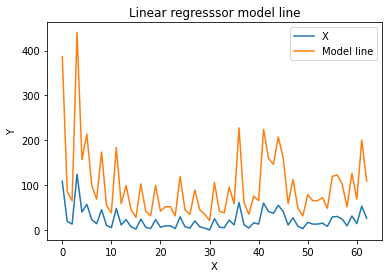

In [13]:
model_line = LR.predict(DF["X"].values[:,np.newaxis])
plt.plot(DF["X"],label='X')
plt.plot(model_line,label='Model line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear regresssor model line')
plt.legend()

*** we see that our model needs to be tunned to adjust to the BIAS. No conclusion can be drawn regarding the varaince.


## Let's find out the confidence interval 
A confidence interval of 95%, is an interval between values that our prediction has 95% of chances to be there. 
This is calculated based on the standard deviation and a gaussian curve.

In [14]:
def get_pred_interval(prediction,y_test,y_pred,pi= 0.95):

  #get standard deviation of y_test
    sum_errs = np.sum((y_test - y_pred)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
  #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    
  #generate prediction interval lower and upper bound 
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper


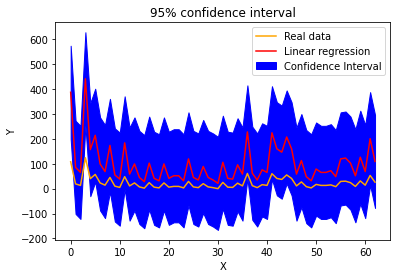

In [16]:
## Plot confidence interval of linear regression  - 95% 
lower_vet = []
upper_vet = []

for i in model_line:
    # lower, prediction, upper =  get_pred_interval(i, DF["X"].values[:,np.newaxis], model_line)
    lower, prediction, upper =  get_pred_interval(i, DF["X"], model_line)
    lower_vet.append(lower)
    upper_vet.append(upper)

plt.fill_between(np.arange(0,len(DF["X"]),1),upper_vet, lower_vet, color='b',label='Confidence Interval')
plt.plot(np.arange(0,len(DF["X"]),1),DF["X"],color='orange',label='Real data')
plt.plot(model_line,'r',label='Linear regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('95% confidence interval')
plt.legend()

plt.show()

** So We see that the data line falls within the confidence range for the most part. Which is good news to us :) 

# Fine tunning the Model 

Let's see if we get better by regularising the model 





For this i use elastice net regressor since it has both L1 & L2 regularization 


In [18]:
# Lets use grid searhc to find the best parameters for Elastic Net 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold

In [39]:


X = DF["X"].values[:,np.newaxis]
Y = DF["Y"].values[:,np.newaxis]

model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


# define grid
grid = dict()
grid['alpha'] = [1.0, 10.0, 15,20,30,100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)


# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, Y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.608
Config: {'alpha': 15, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44755.2472721188, tolerance: 47.28182898412698
  positive)


In [20]:

EN=  ElasticNet(alpha=15,l1_ratio=0)
#lets fit 
EN.fit(x_train_,y_train)
y_pred = EN.predict(x_test_)
# Lets calculate r2 score which is used to acces the fitness of the regressor
from sklearn.metrics import r2_score
print("r2:", r2_score(y_test, y_pred))
# Let calculate MAE to get an idea where we stand 
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

r2: 0.7948307054226622
MAE: 27.592650450690744


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34766.88072385254, tolerance: 38.80260446808511
  positive)


#### Comparing 
LR results
r2: 0.7971386424990525
MAE: 27.391486320581407

Comparing LR we dont get a better model using elastic net. 

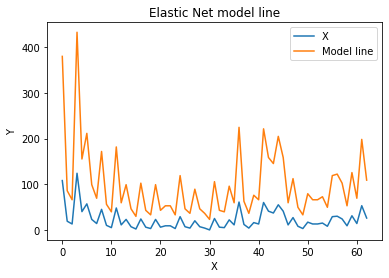

In [21]:
model_line = EN.predict(DF["X"].values[:,np.newaxis])
plt.plot(DF["X"],label='X')
plt.plot(model_line,label='Model line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Elastic Net model line')
plt.legend()

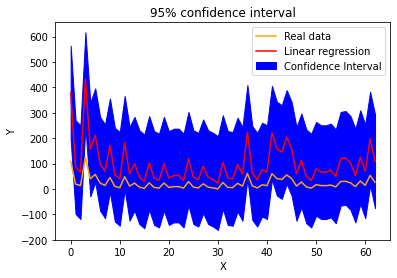

In [22]:
lower_vet = []
upper_vet = []

for i in model_line:
    # lower, prediction, upper =  get_pred_interval(i, DF["X"].values[:,np.newaxis], model_line)
    lower, prediction, upper =  get_pred_interval(i, DF["X"], model_line)
    lower_vet.append(lower)
    upper_vet.append(upper)

plt.fill_between(np.arange(0,len(DF["X"]),1),upper_vet, lower_vet, color='b',label='Confidence Interval')
plt.plot(np.arange(0,len(DF["X"]),1),DF["X"],color='orange',label='Real data')
plt.plot(model_line,'r',label='Linear regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('95% confidence interval')
plt.legend()

plt.show()

## It seems like the regularization by elastic didnt help that much,

Let's now turn our attention to the data in Hand 

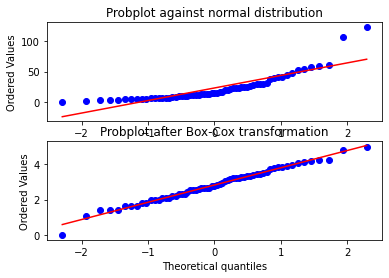

In [23]:
#The QQ Plot allows us to see deviation of a normal distribution much better than in a Histogram or Box Plot.

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = DF['X']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt= stats.yeojohnson(DF["X"],lmbda=0.01)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

** ignoring the two points x>70 
we see that X is not following normal distribution. That is something we need to fix for Linear regressor to work better. 


We can use the Box-cox model for transforming the data. But we can ha problem, Box cox only works on +ve values. So we  use yeo-johnson transformation which is an extension of box cox to handle -ve values


In [24]:
DF["XT"] = xt

#lets split the data 
from sklearn.model_selection import train_test_split
x_train_t,x_test_t,y_train_t,y_test_t = train_test_split(DF["XT"],DF["Y"],random_state= 1)

print(x_train_t.shape,y_train_t.shape)
print(x_test_t.shape,y_test_t.shape)


x_train_t = x_train_t[:,np.newaxis]
x_test_t = x_test_t[:,np.newaxis]

(47,) (47,)
(16,) (16,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


In [25]:
## Building linear regression on trandformed data


In [26]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
#lets fit 
LR.fit(x_train_t,y_train_t)
y_pred_t = LR.predict(x_test_t)
# Lets calculate r2 score which is used to acces the fitness of the regressor
from sklearn.metrics import r2_score
print("r2:", r2_score(y_test_t, y_pred))
# Let calculate MAE to get an idea where we stand 
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test_t,y_pred_t))

r2: 0.7948307054226622
MAE: 28.413447775427333


Hmm something went wrong.. MAE is worse than before..
Let's see what happened to the data.


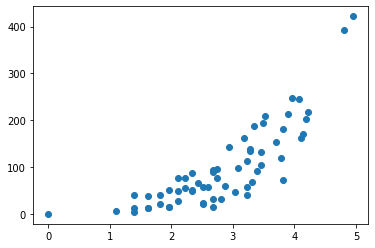

In [27]:
plt.scatter(DF['XT'],DF['Y'])
plt.show()

Okay now the transormed data cannot be fitted using a straight line. Instead we need a polynomial curve. So let's build Support vector machine with polynomial kernel. So that we can fit a hyperplane on this data

In [29]:


from sklearn import svm
parameters = {"C": [1e0, 1e2, 1e3]}
reg =  svm.SVR(kernel='poly')

reg_cv = GridSearchCV(reg, parameters,return_train_score=True,scoring='r2')

reg_cv.fit(DF['XT'].values[:,np.newaxis],DF['Y'].values[:,np.newaxis])

reg_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1.0}

In [31]:
reg_cv.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
svr=  svm.SVR(C=1.0,degree=3,kernel='poly',coef0=1,gamma='auto')
#lets fit 
svr.fit(x_train_t,y_train)
y_pred = svr.predict(x_test_t)
# Lets calculate r2 score which is used to acces the fitness of the regressor
from sklearn.metrics import r2_score
print("r2:", r2_score(y_test, y_pred))
# Let calculate MAE to get an idea where we stand 
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

r2: 0.7712798701379557
MAE: 27.070085138831992


Nice we got our lowest MAE

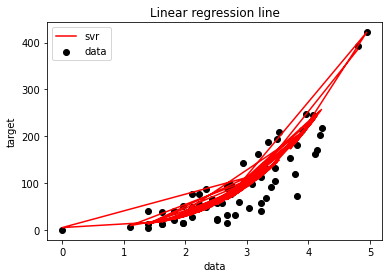

In [47]:
plt.scatter(DF['XT'], DF['Y'], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(DF["XT"], svr.predict(DF["XT"].values[:,np.newaxis]), c='r',
         label='svr')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Linear regression line')
plt.legend()

There is a high possibility that i've overfitted the model..Still this line looks absolutly beautiful



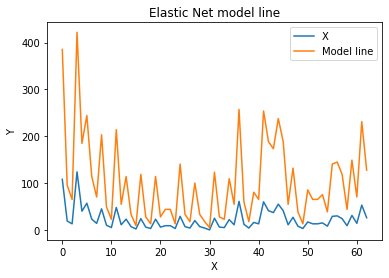

In [50]:
model_line = svr.predict(DF["XT"].values[:,np.newaxis])
plt.plot(DF["X"],label='X')
plt.plot(model_line,label='Model line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Elastic Net model line')
plt.legend()

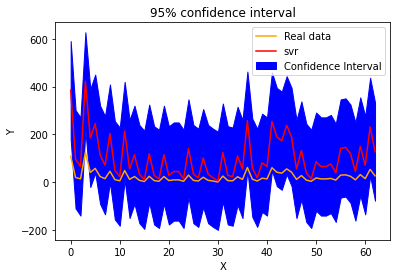

In [52]:
lower_vet = []
upper_vet = []

for i in model_line:
    # lower, prediction, upper =  get_pred_interval(i, DF["X"].values[:,np.newaxis], model_line)
    lower, prediction, upper =  get_pred_interval(i, DF["X"], model_line)
    lower_vet.append(lower)
    upper_vet.append(upper)

plt.fill_between(np.arange(0,len(DF["X"]),1),upper_vet, lower_vet, color='b',label='Confidence Interval')
plt.plot(np.arange(0,len(DF["X"]),1),DF["X"],color='orange',label='Real data')
plt.plot(model_line,'r',label='svr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('95% confidence interval')
plt.legend()

plt.show()

The confidence interval plot for svr is almost perfect. We see that most of the real data fall within the confidence interval.



#polynomial feature

Just our of curiosity lets see what happens if we do basis expansion to our dataset. i.e create polynomial features 

In [81]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train_t)
poly_x_test = poly.transform(x_test_t)

poly_x = poly.fit_transform(DF["XT"].values[:,np.newaxis])

In [75]:
poly_lr = LinearRegression()
poly_lr.fit(poly_x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
poly_pred = poly_lr.predict(poly_x_test)

In [68]:
y_pred = poly_pred
# Lets calculate r2 score which is used to acces the fitness of the regressor
from sklearn.metrics import r2_score
print("r2:", r2_score(y_test, y_pred))
# Let calculate MAE to get an idea where we stand 
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

r2: 0.8014365742948675
MAE: 25.67018222045307


YAY!!! Highest so far!

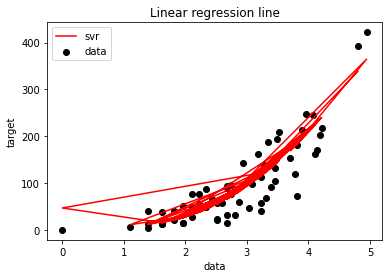

In [83]:
plt.scatter(DF['XT'], DF['Y'], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(DF["XT"], poly_lr.predict(poly_x), c='r',
         label='polynomial regression')

plt.xlabel('data')
plt.ylabel('target')
plt.title('poluynomial regression line')
plt.legend()

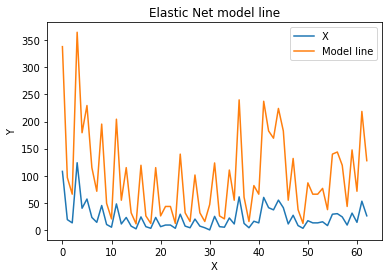

In [85]:
model_line = poly_lr.predict(poly_x)
plt.plot(DF["X"],label='X')
plt.plot(model_line,label='Model line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Elastic Net model line')
plt.legend()

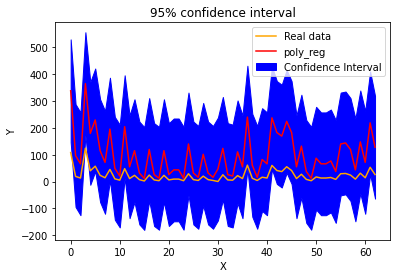

In [87]:
lower_vet = []
upper_vet = []

for i in model_line:
    # lower, prediction, upper =  get_pred_interval(i, DF["X"].values[:,np.newaxis], model_line)
    lower, prediction, upper =  get_pred_interval(i, DF["X"], model_line)
    lower_vet.append(lower)
    upper_vet.append(upper)

plt.fill_between(np.arange(0,len(DF["X"]),1),upper_vet, lower_vet, color='b',label='Confidence Interval')
plt.plot(np.arange(0,len(DF["X"]),1),DF["X"],color='orange',label='Real data')
plt.plot(model_line,'r',label='poly_reg')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('95% confidence interval')
plt.legend()

plt.show()

# Conclusion
So, We found the we are able to get a good fit for our regression model once we use yeojohnson transforamtion to get its distribution right and create polynomial features out of  it. The Highest score acheived was 

*   r2 score : 0.80
*   Mean absolute error: 25.6

The respective Confidence interval plots are furnshed above.

With this limited data. This is the best i was able to do.
Hope you had a nice read. 

Thanks for the oppurtunity. I really enjoyed do ing this.
Please Let me know your commments.

-Nitin shravan

